<a href="https://colab.research.google.com/github/SukriGin2/Code-Ranger-Works/blob/main/56_3_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Step 1: Generate Synthetic Transaction Data

In [ ]:
np.random.seed(42)
num_transactions = 50
data ={
    'Transaction ID': np.arange(1,num_transactions + 1),
    'Amount': np.random.randint(10,5000, num_transactions),
    'Frequency': np.random.randint(1,50,num_transactions),
    'Location ID': np.random.randint(1,10, num_transactions)
}
df = pd.DataFrame(data)

In [ ]:
X = df[['Amount','Frequency','Location ID']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df

,Transaction ID,Amount,Frequency,Location ID
0,1,870,47,8
1,2,3782,35,3
2,3,3102,14,3
3,4,476,17,1
4,5,4436,36,5
5,6,3454,40,7
6,7,3181,4,9
7,8,2929,2,7
8,9,140,6,9
9,10,1695,42,8


# Step 3: Perform Hierarchical Clustering

In [ ]:
linked = linkage(X_scaled, method='ward', metric = 'euclidean')


<function matplotlib.pyplot.show(close=None, block=None)>

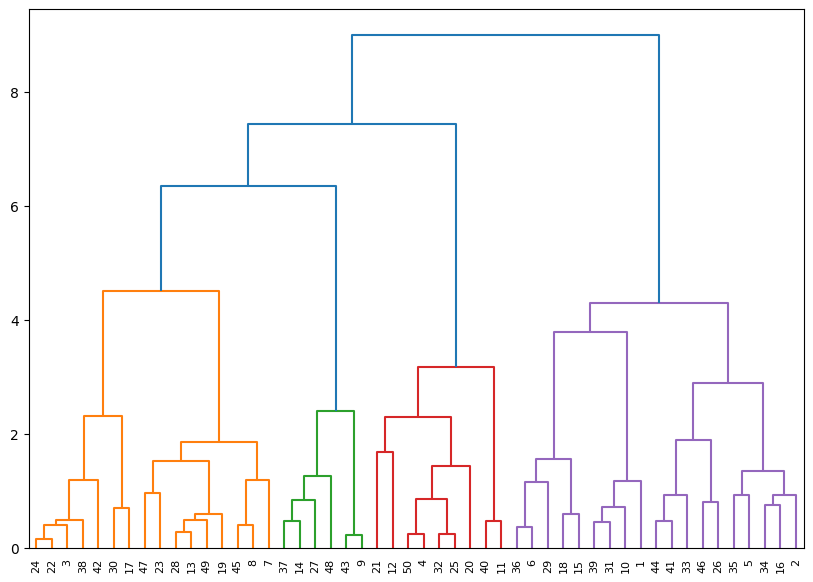

In [ ]:
plt.figure(figsize=(10,7))
dendrogram(linked, labels=df['Transaction ID'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show

# Step 5: Extract the Cluster

In [ ]:
df['Cluster'] = fcluster(linked, t=5, criterion='distance')

In [ ]:
df
df['Cluster'].value_counts()

,count
Cluster,
1,19
4,16
2,9
3,6


In [ ]:
suspicious_cluster = df['Cluster'].value_counts().idxmin()
suspicious_cluster = df[df['Cluster'] == suspicious_cluster]

In [ ]:
suspicious_cluster

,Transaction ID,Amount,Frequency,Location ID,Cluster
8,9,140,6,9,3
13,14,1194,26,7,3
26,27,199,21,7,3
36,37,656,29,7,3
42,43,251,9,9,3
47,48,1488,24,9,3
